In [1]:
import numpy as np
import matplotlib.pyplot as plt

#from sympy import *
#from sympy.plotting import plot
#from sympy import lambdify

In [13]:
# Define your equation here

# LS-equation as a function of temperature
def ratio (T, E_wf, E_ip, sw, k):
#    T = np.array(range(0.,3000.))
    return sw * np.exp((E_wf - E_ip)/(k*T))

# Ionization rate for the given ratio as a function of temperature
def ionization (T, E_wf, E_ip, sw, k):
#    T = np.array(range(0.,3000.))
    return ratio(T, E_wf, E_ip, sw, k) / (1.0 + ratio(T, E_wf, E_ip, sw, k))

# Neutralization rate for the given ratio as a function of temperature
def neutralization (T, E_wf, E_ip, sw, k):
    #    T = np.array(range(0.,3000.))
    return 1.0 - ionization(T, E_wf, E_ip, sw, k)

def ionization_N (T, E_wf, E_ip, sw, k, N):
    return N*ratio(T, E_wf, E_ip, sw, k) / (1.0 + N*ratio(T, E_wf, E_ip, sw, k))

In [14]:
# Constants and input parameters

sw = 1.0/2.0 # Statistical weight for alkalis
E_wf = 4.05
    # Au : 5.1-5.26 eV
    # Ta : 4.0-4.8 eV
    # Y : 3.1 eV
    # Zr : 4.05 eV
    # from https://materials.springer.com/googlecdn/assets/sm_lbs/167/sm_lbs_978-3-540-47399-2_16/sm_lbs_978-3-540-47399-2_16.pdf?trackRequired=true&originUrl=/lb/docs/sm_lbs_978-3-540-47399-2_16
E_ip = 4.07 # For 212-Fr
k = 8.61733 * 10**(-5) # eV/K

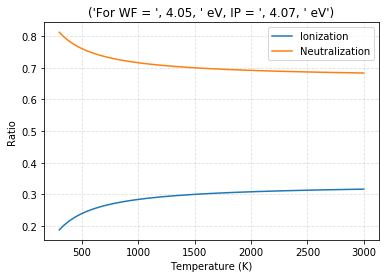

In [15]:
# Plot graph

T = np.array(range(300,3000))
#plt.plot(T, ratio(T,E_wf,E_ip,sw,k), label='Ion/Atom Ratio')
plt.plot(T, ionization(T,E_wf,E_ip,sw,k), label='Ionization')
plt.plot(T, neutralization(T,E_wf,E_ip,sw,k), label='Neutralization')

title = "For WF = ",E_wf," eV, IP = ",E_ip," eV"
plt.title(title)
plt.xlabel('Temperature (K)')
plt.ylabel('Ratio')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot
plt.show()

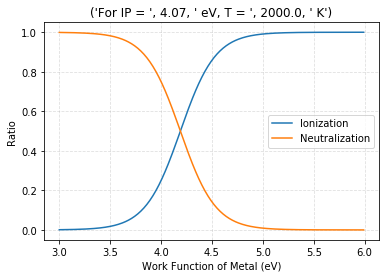

In [16]:
# Work-function dependence

T = 2000. # K

WF = np.array(range(300,600))/100.
plt.plot(WF, ionization(T,WF,E_ip,sw,k), label='Ionization')
plt.plot(WF, neutralization(T,WF,E_ip,sw,k), label='Neutralization')

title = "For IP = ",E_ip," eV, T = ",T," K"
plt.title(title)
plt.xlabel('Work Function of Metal (eV)')
plt.ylabel('Ratio')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot
plt.show()

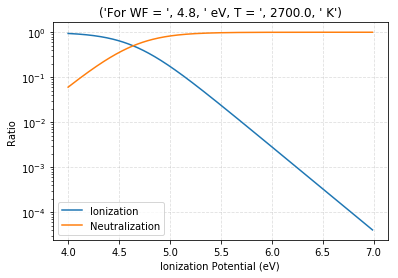

In [17]:
# Ionization-Potential dependence

T = 2700. #K
wf_Ta = 4.8 #

IP = np.array(range(400,700))/100.
plt.plot(IP, ionization(T,wf_Ta,IP,sw,k), label='Ionization')
plt.plot(IP, neutralization(T,wf_Ta,IP,sw,k), label='Neutralization')
plt.yscale('log')

title = "For WF = ",wf_Ta," eV, T = ",T," K"
plt.title(title)
plt.xlabel('Ionization Potential (eV)')
plt.ylabel('Ratio')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot
plt.show()

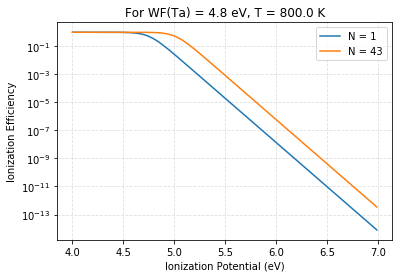

In [52]:
# Ionization-Potential dependence with N-factor

T = 800. # K
wf = 4.8 # eV
N = 43 # Fitted

IP = np.array(range(400,700))/100.
plt.plot(IP, ionization(T,wf,IP,sw,k), label='N = 1')
plt.plot(IP, ionization_N(T,wf,IP,sw,k,N), label='N = 43')
plt.yscale('log')

title = 'For WF(Ta) = {} eV, T = {} K'.format(wf,T)
plt.title(title)
plt.xlabel('Ionization Potential (eV)')
plt.ylabel('Ionization Efficiency')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot
plt.savefig('{}K.pdf'.format(T))
plt.show()

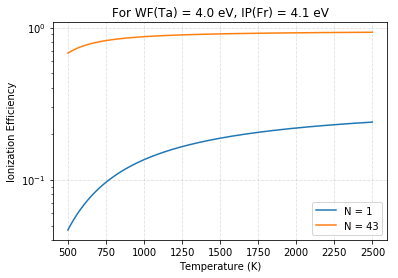

In [64]:
# Temperature dependence with N-factor

wf = 4.0 # eV
ip = 4.1 # eV
N = 43 # Fitted

T = np.array(range(500,2500))
plt.plot(T, ionization(T,wf,ip,sw,k), label='N = 1')
plt.plot(T, ionization_N(T,wf,ip,sw,k,N), label='N = 43')
plt.yscale('log')

title = 'For WF(Ta) = {} eV, IP(Fr) = {} eV'.format(wf,ip)
plt.title(title)
plt.xlabel('Temperature (K)')
plt.ylabel('Ionization Efficiency')

# Add a grid
plt.grid(alpha=.4,linestyle='--')

# Add a Legend
plt.legend()

# Show the plot
plt.savefig('temp_{}eV.pdf'.format(wf))
plt.show()

In [ ]:
# At the surface of the Au target
wf_Au = 5.2 # eV
T = 

# Formed nuclei
ip_Fr = 4.07 # eV
rt_Fr = 0.92
ip_Rn = 10.7 # eV
rt_Rn = 0.007
ip_At = 9.32 # eV
rt_At = 0.073

print 'Ratio of Fr ions:'
print rt_Fr * ionization(T, wf_Au, ip_Fr, sw, k)

print 'Ratio of Rn ions:'
print rt_Rn * ionization(T, wf_Au, ip_Rn, sw, k)

print 'Ratio of At ions:'
print rt_At * ionization(T, wf_Au, ip_Rn, sw, k)